# Exploration of Star Wars fans data
** Synopsis **: We explore a dataset on the public perception of the Star Wars franchise. The dataset was compiled by FiveThirtyEight. 

In [1]:
%matplotlib inline

In [2]:
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
star_wars = pd.read_csv('star_wars.csv', encoding='ISO-8859-1')

In [4]:
star_wars.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1187 entries, 0 to 1186
Data columns (total 38 columns):
RespondentID                                                                                                                                     1186 non-null float64
Have you seen any of the 6 films in the Star Wars franchise?                                                                                     1187 non-null object
Do you consider yourself to be a fan of the Star Wars film franchise?                                                                            837 non-null object
Which of the following Star Wars films have you seen? Please select all that apply.                                                              674 non-null object
Unnamed: 4                                                                                                                                       572 non-null object
Unnamed: 5                                                       

In [5]:
star_wars.head(10)

,RespondentID,Have you seen any of the 6 films in the Star Wars franchise?,Do you consider yourself to be a fan of the Star Wars film franchise?,Which of the following Star Wars films have you seen? Please select all that apply.,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Please rank the Star Wars films in order of preference with 1 being your favorite film in the franchise and 6 being your least favorite film.,...,Unnamed: 28,Which character shot first?,Are you familiar with the Expanded Universe?,Do you consider yourself to be a fan of the Expanded Universe?ÂÃ¦,Do you consider yourself to be a fan of the Star Trek franchise?,Gender,Age,Household Income,Education,Location (Census Region)
0,NaN,Response,Response,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,Star Wars: Episode IV A New Hope,Star Wars: Episode V The Empire Strikes Back,Star Wars: Episode VI Return of the Jedi,Star Wars: Episode I The Phantom Menace,...,Yoda,Response,Response,Response,Response,Response,Response,Response,Response,Response
1,3.292880e+09,Yes,Yes,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,Star Wars: Episode IV A New Hope,Star Wars: Episode V The Empire Strikes Back,Star Wars: Episode VI Return of the Jedi,3,...,Very favorably,I don't understand this question,Yes,No,No,Male,18-29,NaN,High school degree,South Atlantic
2,3.292880e+09,No,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,Yes,Male,18-29,"$0 - $24,999",Bachelor degree,West South Central
3,3.292765e+09,Yes,No,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,NaN,NaN,NaN,1,...,Unfamiliar (N/A),I don't understand this question,No,NaN,No,Male,18-29,"$0 - $24,999",High school degree,West North Central
4,3.292763e+09,Yes,Yes,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,Star Wars: Episode IV A New Hope,Star Wars: Episode V The Empire Strikes Back,Star Wars: Episode VI Return of the Jedi,5,...,Very favorably,I don't understand this question,No,NaN,Yes,Male,18-29,"$100,000 - $149,999",Some college or Associate degree,West North Central
5,3.292731e+09,Yes,Yes,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,Star Wars: Episode IV A New Hope,Star Wars: Episode V The Empire Strikes Back,Star Wars: Episode VI Return of the Jedi,5,...,Somewhat favorably,Greedo,Yes,No,No,Male,18-29,"$100,000 - $149,999",Some college or Associate degree,West North Central
6,3.292719e+09,Yes,Yes,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,Star Wars: Episode IV A New Hope,Star Wars: Episode V The Empire Strikes Back,Star Wars: Episode VI Return of the Jedi,1,...,Very favorably,Han,Yes,No,Yes,Male,18-29,"$25,000 - $49,999",Bachelor degree,Middle Atlantic
7,3.292685e+09,Yes,Yes,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,Star Wars: Episode IV A New Hope,Star Wars: Episode V The Empire Strikes Back,Star Wars: Episode VI Return of the Jedi,6,...,Very favorably,Han,Yes,No,No,Male,18-29,NaN,High school degree,East North Central
8,3.292664e+09,Yes,Yes,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,Star Wars: Episode IV A New Hope,Star Wars: Episode V The Empire Strikes Back,Star Wars: Episode VI Return of the Jedi,4,...,Very favorably,Han,No,NaN,Yes,Male,18-29,NaN,High school degree,South Atlantic
9,3.292654e+09,Yes,Yes,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,Star Wars: Episode IV A New Hope,Star Wars: Epi

In [6]:
star_wars.columns

Index(['RespondentID',
       'Have you seen any of the 6 films in the Star Wars franchise?',
       'Do you consider yourself to be a fan of the Star Wars film franchise?',
       'Which of the following Star Wars films have you seen? Please select all that apply.',
       'Unnamed: 4', 'Unnamed: 5', 'Unnamed: 6', 'Unnamed: 7', 'Unnamed: 8',
       'Please rank the Star Wars films in order of preference with 1 being your favorite film in the franchise and 6 being your least favorite film.',
       'Unnamed: 10', 'Unnamed: 11', 'Unnamed: 12', 'Unnamed: 13',
       'Unnamed: 14',
       'Please state whether you view the following characters favorably, unfavorably, or are unfamiliar with him/her.',
       'Unnamed: 16', 'Unnamed: 17', 'Unnamed: 18', 'Unnamed: 19',
       'Unnamed: 20', 'Unnamed: 21', 'Unnamed: 22', 'Unnamed: 23',
       'Unnamed: 24', 'Unnamed: 25', 'Unnamed: 26', 'Unnamed: 27',
       'Unnamed: 28', 'Which character shot first?',
       'Are you familiar with the Expan

In [7]:
star_wars.dropna(axis=0,subset=['RespondentID'], inplace=True)

In [8]:
seen_movies_col = 'Have you seen any of the 6 films in the Star Wars franchise?'
fan_col = 'Do you consider yourself to be a fan of the Star Wars film franchise?'
yes_no_dict = {'Yes':True, 'No':False}

star_wars[seen_movies_col] = star_wars[seen_movies_col].map(yes_no_dict)
star_wars[fan_col] = star_wars[fan_col].map(yes_no_dict)

In [9]:
star_wars = star_wars.rename(columns={
    'Which of the following Star Wars films have you seen? Please select all that apply.': 'seen_1',
    'Unnamed: 4': 'seen_2',
    'Unnamed: 5': 'seen_3',
    'Unnamed: 6': 'seen_4',
    'Unnamed: 7': 'seen_5',
    'Unnamed: 8': 'seen_6',
})

In [10]:
import numpy as np

seen_cols = ['seen_1', 'seen_2', 'seen_3', 'seen_4', 'seen_5', 'seen_6']
seen_dict = {
    "Star Wars: Episode I  The Phantom Menace": True,
    "Star Wars: Episode II  Attack of the Clones": True,
    "Star Wars: Episode III  Revenge of the Sith": True,
    "Star Wars: Episode IV  A New Hope": True,
    "Star Wars: Episode V The Empire Strikes Back": True,
    "Star Wars: Episode VI Return of the Jedi": True,
    np.NaN: False
}


for c in seen_cols:
    star_wars[c] = star_wars[c].map(seen_dict)

In [11]:
star_wars.head()

,RespondentID,Have you seen any of the 6 films in the Star Wars franchise?,Do you consider yourself to be a fan of the Star Wars film franchise?,seen_1,seen_2,seen_3,seen_4,seen_5,seen_6,Please rank the Star Wars films in order of preference with 1 being your favorite film in the franchise and 6 being your least favorite film.,...,Unnamed: 28,Which character shot first?,Are you familiar with the Expanded Universe?,Do you consider yourself to be a fan of the Expanded Universe?ÂÃ¦,Do you consider yourself to be a fan of the Star Trek franchise?,Gender,Age,Household Income,Education,Location (Census Region)
1,3.292880e+09,True,True,True,True,True,True,True,True,3,...,Very favorably,I don't understand this question,Yes,No,No,Male,18-29,NaN,High school degree,South Atlantic
2,3.292880e+09,False,NaN,False,False,False,False,False,False,NaN,...,NaN,NaN,NaN,NaN,Yes,Male,18-29,"$0 - $24,999",Bachelor degree,West South Central
3,3.292765e+09,True,False,True,True,True,False,False,False,1,...,Unfamiliar (N/A),I don't understand this question,No,NaN,No,Male,18-29,"$0 - $24,999",High school degree,West North Central
4,3.292763e+09,True,True,True,True,True,True,True,True,5,...,Very favorably,I don't understand this question,No,NaN,Yes,Male,18-29,"$100,000 - $149,999",Some college or Associate degree,West North Central
5,3.292731e+09,True,True,True,True,True,True,True,True,5,...,Somewhat favorably,Greedo,Yes,No,No,Male,18-29,"$100,000 - $149,999",Some college or Associate degree,West North Central


In [12]:
star_wars = star_wars.rename(columns={
    'Please rank the Star Wars films in order of preference with 1 being your favorite film in the franchise and 6 being your least favorite film.': 'ranking_1',
    'Unnamed: 10': 'ranking_2',
    'Unnamed: 11': 'ranking_3',
    'Unnamed: 12': 'ranking_4',
    'Unnamed: 13': 'ranking_5',
    'Unnamed: 14': 'ranking_6',
})
star_wars[star_wars.columns[9:15]] = star_wars[star_wars.columns[9:15]].astype(float)

In [13]:
star_wars[star_wars.columns[9:15]].mean()

ranking_1    3.732934
ranking_2    4.087321
ranking_3    4.341317
ranking_4    3.272727
ranking_5    2.513158
ranking_6    3.047847
dtype: float64

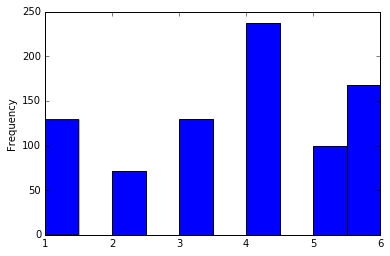

In [14]:
star_wars['ranking_1'].plot.hist()

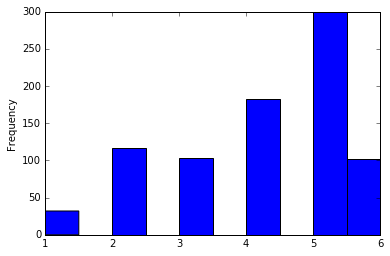

In [15]:
star_wars['ranking_2'].plot.hist()

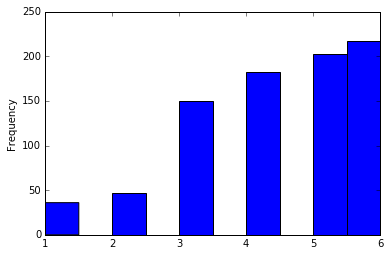

In [16]:
star_wars['ranking_3'].plot.hist()

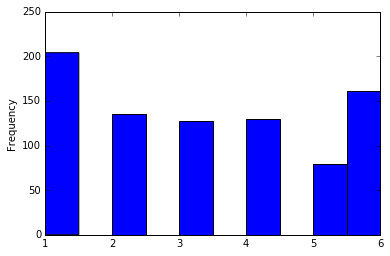

In [17]:
star_wars['ranking_4'].plot.hist()

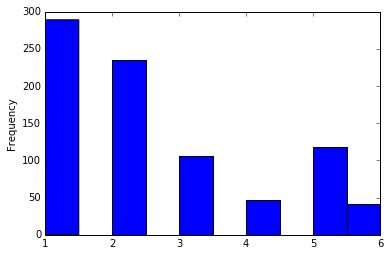

In [18]:
star_wars['ranking_5'].plot.hist()

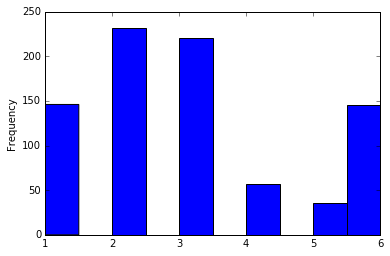

In [19]:
star_wars['ranking_6'].plot.hist()

**Conclusions**: While there is not a clear 'most preferred movie', there is otherwise a noticeable trend. The respondents were more likely to rank the movies 1, 2 in position 5, the movies 1-3 in position 6 (last) and finally the movies 5 and 6 in the second and third position.

We speculate that the movie at place 1 was chosen based on highly subjective factors (good memories associated with the movie, etc) and thus it is less indicative of overall quality. Indeed, while position 1 is highly contentious (it is close to uniformly distributed), the remaining positions show a clearer trend.

The notable exception is ranking 4. We speculate that since the fourth position is the farthest apart from the extremes 1 and 6, respondents did not have a strong opinion and thus filled it closely to uniformly at random. Position 3 is different because of the particular significance in "top 3" lists.

In [20]:
total_seen = star_wars[['seen_1', 'seen_2', 'seen_3', 'seen_4', 'seen_5', 'seen_6']].sum()
total_seen

seen_1    673
seen_2    571
seen_3    550
seen_4    607
seen_5    758
seen_6    738
dtype: int64

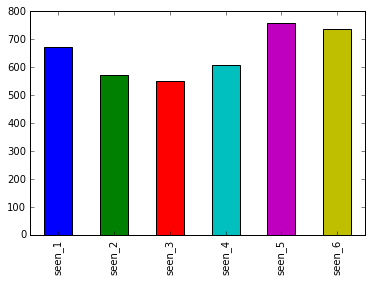

In [21]:
total_seen.plot(kind='bar')

**Conclusions**: Surprisingly, it seems that several people have watched Episode V and Episode VI without having seen Episode I. Overall, since more people have watched Episode V and VI

# Analyzing impact of gender on movie preference

In [22]:
males = star_wars[star_wars["Gender"] == "Male"]
females = star_wars[star_wars["Gender"] == "Female"]

In [23]:
total_seen_male = males[['seen_1', 'seen_2', 'seen_3', 'seen_4', 'seen_5', 'seen_6']].sum()
total_seen_male

seen_1    361
seen_2    323
seen_3    317
seen_4    342
seen_5    392
seen_6    387
dtype: int64

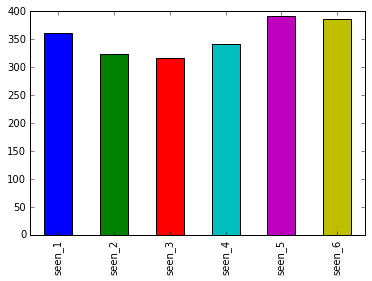

In [24]:
total_seen_male.plot(kind='bar')

In [25]:
total_seen_female = females[['seen_1', 'seen_2', 'seen_3', 'seen_4', 'seen_5', 'seen_6']].sum()
total_seen_female

seen_1    298
seen_2    237
seen_3    222
seen_4    255
seen_5    353
seen_6    338
dtype: int64

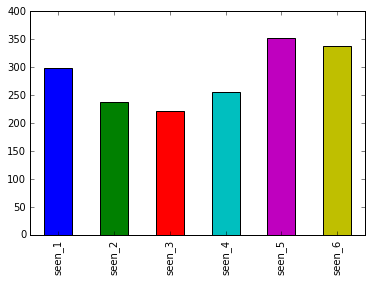

In [27]:
total_seen_female.plot(kind='bar')

**Conclusions**: Which movie has been seen does not seem to depend on the gender of the viewers. Indeed, the patter of the bar graphs is almost identical for males and females.

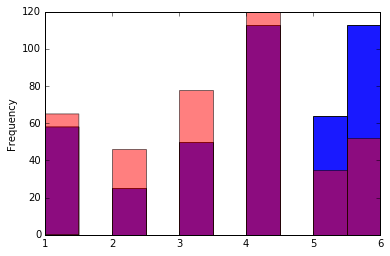

In [34]:
males['ranking_1'].plot.hist(alpha=0.9, color='blue')
females['ranking_1'].plot.hist(alpha=0.5, color='red')

**Conclusions**: It seems that females have a stronger preference for the prequel movies (1-3) than males. However, the movie A New Hope is the most liked across both genders.

# Analysis of _Which character shot first?_ column
"Han shot first" is a well-known trope among Star Wars fans. This is a reference to a scene in A New Hope in which Han shot and killed the bounty hunter Greedo. This scene was modified in later versions of the movie to make it look like Han was shooting back at Greedo instead of shooting first. 

Since this reference is quite obscure outside of the circles of fans of the movies, we expect the column _Which character shot first?_ to correlate highly with the column _Do you consider yourself to be a fan of the Star Wars film franchise?_

In [45]:
long_col_names_map = {'Do you consider yourself to be a fan of the Star Wars film franchise?': 'fan',
                      'Which character shot first?': 'who_shot_first'
                     }
star_wars = star_wars.rename(columns=long_col_names_map)

In [48]:
star_wars['who_shot_first'].value_counts()

Han                                 325
I don't understand this question    306
Greedo                              197
Name: who_shot_first, dtype: int64

In [59]:
star_wars.loc[star_wars['fan']==True, 'who_shot_first'].value_counts(normalize=True)

Han                                 0.491743
Greedo                              0.277064
I don't understand this question    0.231193
Name: who_shot_first, dtype: float64

In [60]:
star_wars.loc[star_wars['fan']==False, 'who_shot_first'].value_counts(normalize=True)

I don't understand this question    0.636042
Han                                 0.201413
Greedo                              0.162544
Name: who_shot_first, dtype: float64

**Conclusions**: Unsurprisingly, the vast majority of respondents who did not identify as fans did not understand the question, while roughly half of the fans knew the 'correct' answer.